# **Challenge: Model Comparison**

In [1119]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

For this exercise, we will use the dataset of Boston house prices provided by scikit-learn to build separate OLS and KNN models in order to compare their performance.

In [1120]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [1121]:
boston.data.shape

(506, 13)

In [1122]:
boston.target.shape

(506,)

In [1123]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [1124]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [1125]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [1126]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Since we simply want to compare an OLS model with a KNN model, for the sake of simplicity we will only include the features CRIM, RM, and LSTAT in our models. Before setting up our models, we will take a look at the regression plots and distribution plots, transforming the data as necessary.

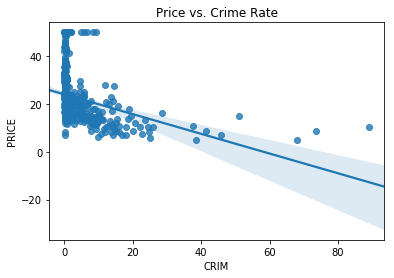

In [1127]:
g = sns.regplot(x=df['CRIM'], y=df['PRICE'], data=df)
g.set(xlabel='CRIM', ylabel='PRICE', title='Price vs. Crime Rate')
plt.show()

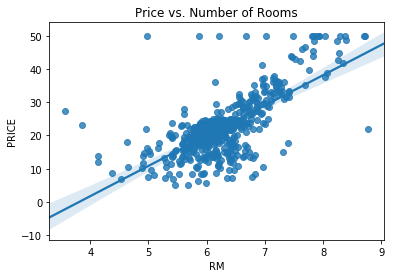

In [1128]:
g = sns.regplot(x=df['RM'], y=df['PRICE'], data=df)
g.set(xlabel='RM', ylabel='PRICE', title='Price vs. Number of Rooms')
plt.show()

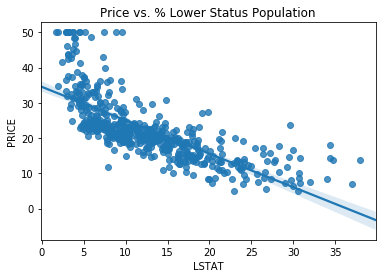

In [1129]:
g = sns.regplot(x=df['LSTAT'], y=df['PRICE'], data=df)
g.set(xlabel='LSTAT', ylabel='PRICE', title='Price vs. % Lower Status Population')
plt.show()

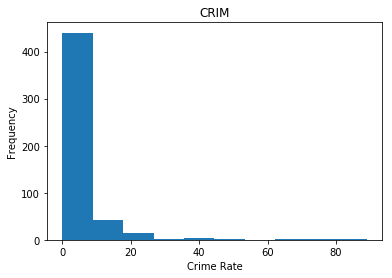

In [1130]:
plt.hist(df.CRIM)
plt.title("CRIM")
plt.xlabel("Crime Rate")
plt.ylabel("Frequency")
plt.show()

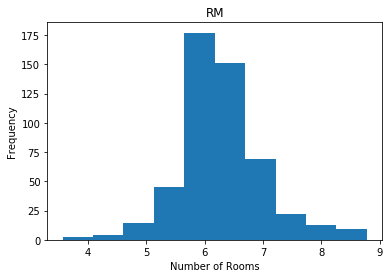

In [1131]:
plt.hist(df.RM)
plt.title("RM")
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")
plt.show()

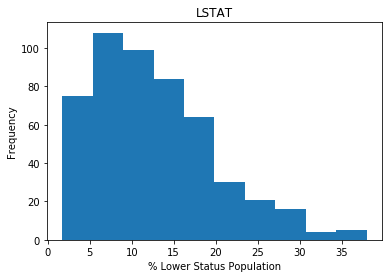

In [1132]:
plt.hist(df.LSTAT)
plt.title("LSTAT")
plt.xlabel("% Lower Status Population")
plt.ylabel("Frequency")
plt.show()

Since both CRIM and LSTAT appear to have lognormal distributions, we can normalize these features by taking the natural log of them.

In [1133]:
df['CRIM'] = np.log(df.CRIM)
df['LSTAT'] = np.log(df.LSTAT)

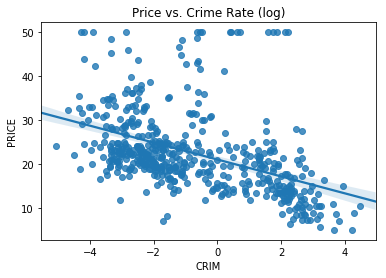

In [1134]:
g = sns.regplot(x=df['CRIM'], y=df['PRICE'], data=df)
g.set(xlabel='CRIM', ylabel='PRICE', title='Price vs. Crime Rate (log)')
plt.show()

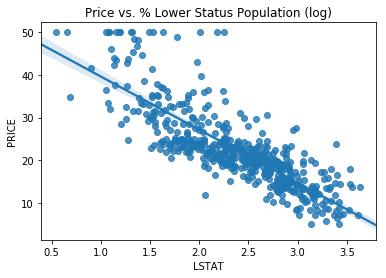

In [1135]:
g = sns.regplot(x=df['LSTAT'], y=df['PRICE'], data=df)
g.set(xlabel='LSTAT', ylabel='PRICE', title='Price vs. % Lower Status Population (log)')
plt.show()

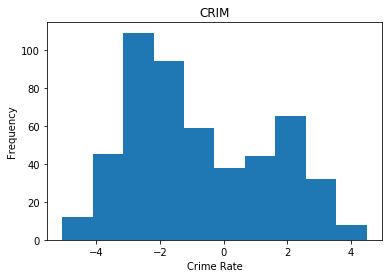

In [1136]:
plt.hist(df.CRIM)
plt.title("CRIM")
plt.xlabel("Crime Rate")
plt.ylabel("Frequency")
plt.show()

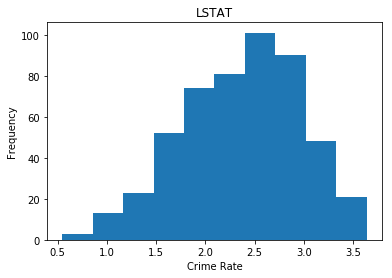

In [1137]:
plt.hist(df.LSTAT)
plt.title("LSTAT")
plt.xlabel("Crime Rate")
plt.ylabel("Frequency")
plt.show()

In [1138]:
data = df.iloc[:, [0, 5, 12]]
target = df.iloc[:, [13]]
data.corr()

,CRIM,RM,LSTAT
CRIM,1.00000,-0.308210,0.589620
RM,-0.30821,1.000000,-0.664528
LSTAT,0.58962,-0.664528,1.000000


All of our features have correlations below 0.7, so we will keep them for now.

# **OLS Model**

In [1139]:
linear_formula = 'PRICE ~ CRIM + RM + LSTAT'
lm = ols(formula=linear_formula, data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     404.1
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          1.98e-133
Time:                        23:48:25   Log-Likelihood:                -1529.5
No. Observations:                 506   AIC:                             3067.
Df Residuals:                     502   BIC:                             3084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2385      3.761      6.178      0.0

We can see that the p-value for CRIM is greater than 0.5, so we can drop this feature and re-fit the model.

In [1140]:
linear_formula = 'PRICE ~ RM + LSTAT'
lm = ols(formula=linear_formula, data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     607.2
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          7.40e-135
Time:                        23:48:25   Log-Likelihood:                -1529.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     503   BIC:                             3078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8865      3.552      6.443      0.0

Even after dropping the CRIM feature, we were still able to get the same R-squared value as before (0.707).

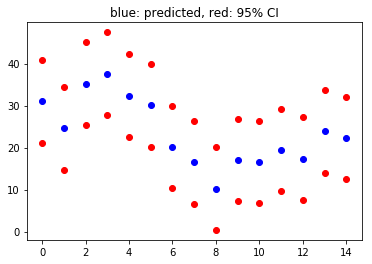

In [1141]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

# **KNN Model**

In [1142]:
# Convert data to z-scores
data_norm = data.apply(stats.zscore)
for k in range(1,25):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(data_norm, target)
    y_pred = knn.predict(data_norm)
    score = cross_val_score(knn, data_norm, target, cv=5)
    print ("Nearest neighbors: {}".format(k))
    print("R-squared Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Nearest neighbors: 1
R-squared Accuracy: 0.3508 (+/- 0.8011)
Nearest neighbors: 2
R-squared Accuracy: 0.4917 (+/- 0.6584)
Nearest neighbors: 3
R-squared Accuracy: 0.5354 (+/- 0.6229)
Nearest neighbors: 4
R-squared Accuracy: 0.5951 (+/- 0.4874)
Nearest neighbors: 5
R-squared Accuracy: 0.6153 (+/- 0.4399)
Nearest neighbors: 6
R-squared Accuracy: 0.6250 (+/- 0.4360)
Nearest neighbors: 7
R-squared Accuracy: 0.6303 (+/- 0.4174)
Nearest neighbors: 8
R-squared Accuracy: 0.6331 (+/- 0.4140)
Nearest neighbors: 9
R-squared Accuracy: 0.6312 (+/- 0.3946)
Nearest neighbors: 10
R-squared Accuracy: 0.6326 (+/- 0.3919)
Nearest neighbors: 11
R-squared Accuracy: 0.6304 (+/- 0.3856)
Nearest neighbors: 12
R-squared Accuracy: 0.6381 (+/- 0.3661)
Nearest neighbors: 13
R-squared Accuracy: 0.6417 (+/- 0.3567)
Nearest neighbors: 14
R-squared Accuracy: 0.6362 (+/- 0.3624)
Nearest neighbors: 15
R-squared Accuracy: 0.6344 (+/- 0.3649)
Nearest neighbors: 16
R-squared Accuracy: 0.6369 (+/- 0.3569)
Nearest neighbors

Interestingly, using OLS regression without cross validation resulted in a better accuracy score than using KNN with cross validation. OLS returned a score of 0.707, while the score for KNN topped out at 0.6417, with k=13 and cv=5. Thus, it appears that an OLS model is more suitable for this dataset.